In [2]:
import numpy as np

for i in np.arange(12, 22):
        filename = (f"{i}.inp")
        target = open(filename, 'w+')
        target.write("""include /home/ben/Documents/gulp_calcs/0_datafiles/na3ocl_structure.inp
""")
        target.write("centre 0.5 0.5 0")
        target.write(f"""
size {i} 24
""")
        target.write("vacancy 0.5 0.5 0")
        target.write("""
include /home/ben/Documents/gulp_calcs/0_datafiles/na3ocl_refitted_potentials.inp    
""")

In [3]:
import glob
import subprocess
from tqdm import tqdm
import multiprocessing
from time import sleep
import random

def gulp(input_path):
    sleep(random.random())
    run = True
    output_path = input_path[:-3] + 'out'
    try:
        with open(output_path) as f:
            file = f.read()
        if 'Job Finished at' in file:
            run = False
    except:
        pass
    if run:
        with open(input_path) as f:
            output_path = input_path[:-3] + 'out'
            with open(output_path, 'w') as o:
                try:
                    a = subprocess.run(['gulp'], stdin = f, stdout = o, timeout=None)
                except:
                    pass

all_cases = sorted(glob.glob('*.inp'), key = lambda x: x.split('/')[-1].split('.')[0])

complete = []

for case in all_cases:
    try:
        with open(case[:-3] + 'out', 'r') as f:
            g = f.read()
        if 'Final energy' in g:
            complete.append(case)
    except:
        pass

cases = [case for case in all_cases if case not in complete]

N = len(cases)

def update():
    pbar.update(1)

if __name__ == '__main__':
    with multiprocessing.Pool() as pool:
        for result in tqdm(pool.imap_unordered(gulp, cases), total=len(cases)):
            pass
    pool.close()
    pool.join()

100%|██████████| 10/10 [05:02<00:00, 30.23s/it]


In [4]:
import re
import glob
import numpy as np

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])
        else:
            continue
    
def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies

energy = energyList('*.out')
energies = []

for i in range(12, 21):
        try:
            energies.append(energy[f'{i}.out'])
        except:
            pass

In [5]:
print(energies)

[4.35867312, 4.26883753, 4.17537332, 3.62764342, 3.89717061, 3.66871564, 3.55191547, 1.65854985, 0.66827877]


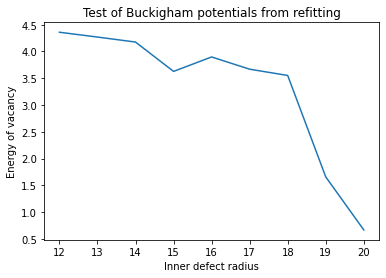

In [8]:
import matplotlib.pyplot as plt

x = list(range(12,21))
y = []


for i in range(12, 21):
    try:
        y.append(energy[f'{i}.out'])
    except:
        pass
    
plt.plot(x, y)
plt.xlabel('Inner defect radius')
plt.ylabel('Energy of vacancy')
plt.title('Test of Buckigham potentials from refitting')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/refiited_test.jpg', bbox_inches='tight', dpi=500)